# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [98]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score

from matplotlib import pyplot as plt
import seaborn as sns

## Data Overview

- Observations
- Sanity checks

In [64]:
df = pd.read_csv('ExtraaLearn.csv')
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [16]:
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [40]:
# list numerical and categorical columns to make EDA easier
num_cols = ['age','website_visits','time_spent_on_website','page_views_per_visit']
cat_cols = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral','status']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [33]:
# summary statistics:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


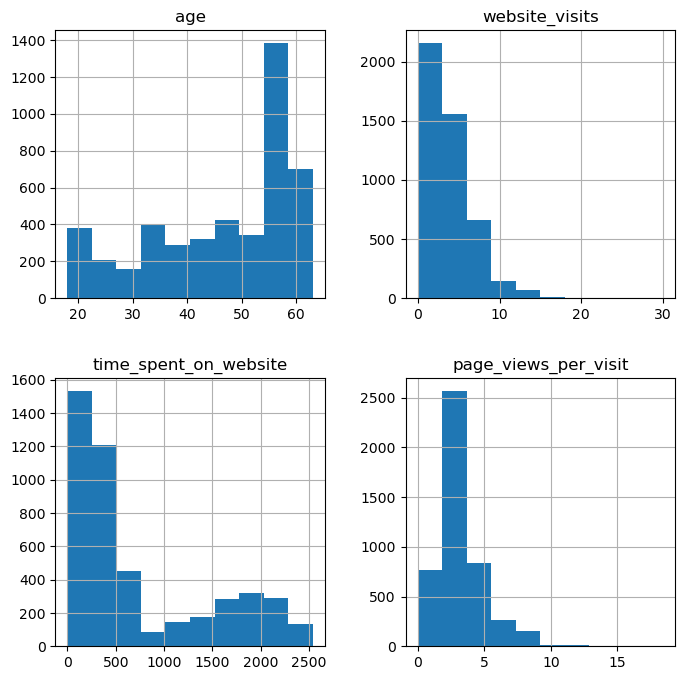

In [36]:
# histograms for numerical columns
df[num_cols].hist(figsize=(8,8))
plt.show()

In [41]:
# for categorical variables, print the proportions of sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*50)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
**************************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
**************************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
**************************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
**************************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
**************************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
**************************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
**************************************************
No     0.84

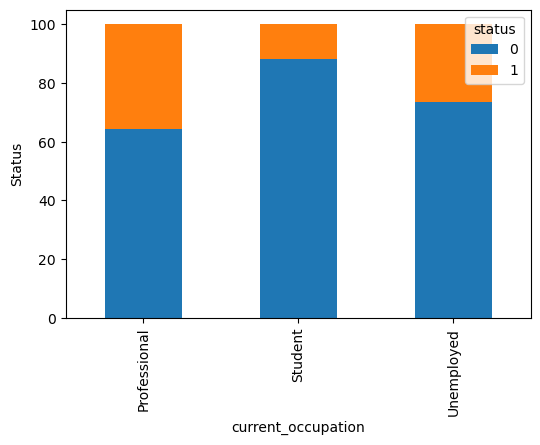

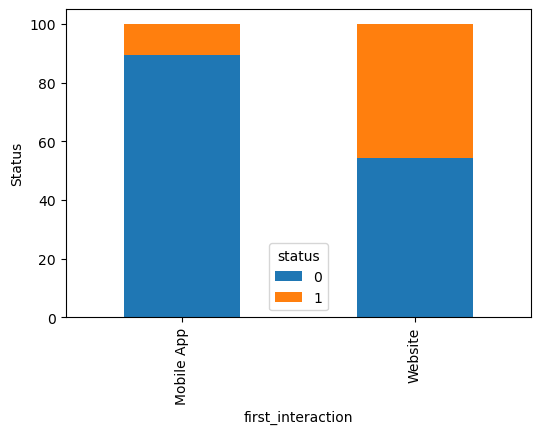

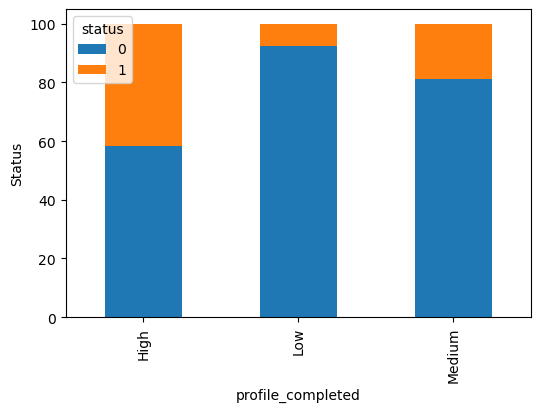

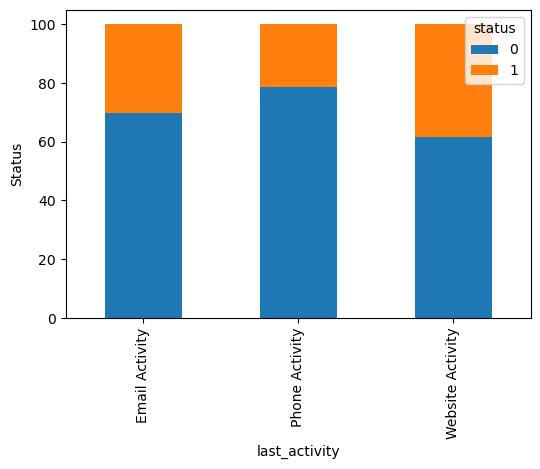

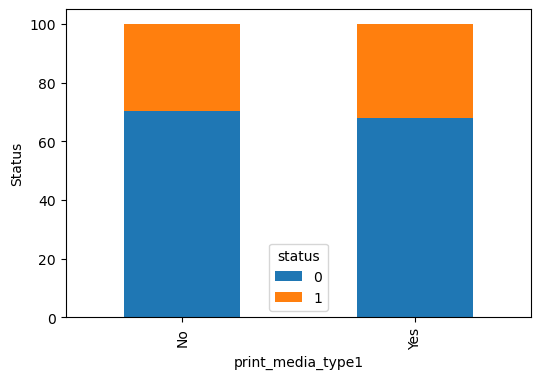

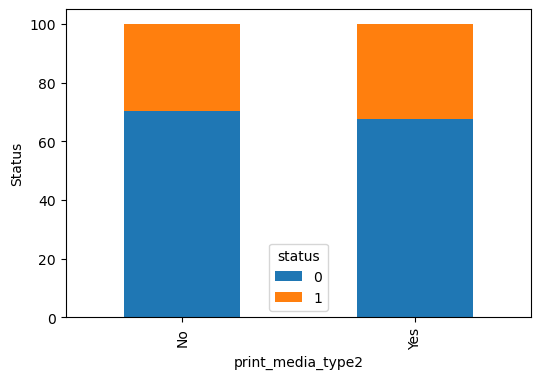

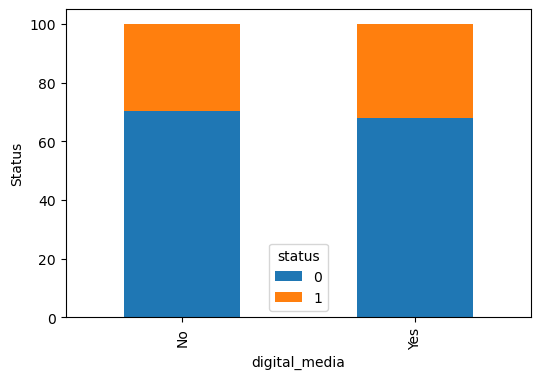

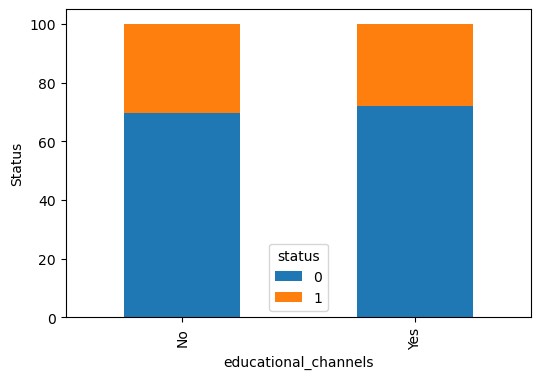

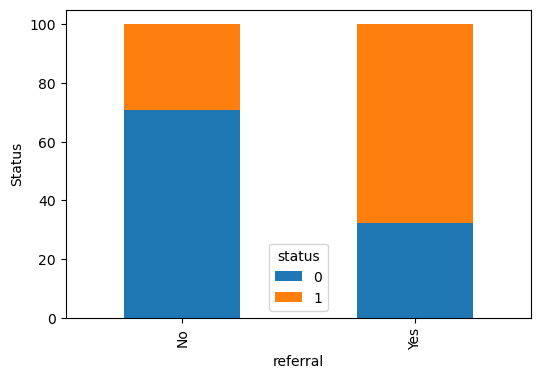

In [53]:
# plot distribution of status for each value of categorical variables
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
        plt.ylabel('Status')


<Axes: >

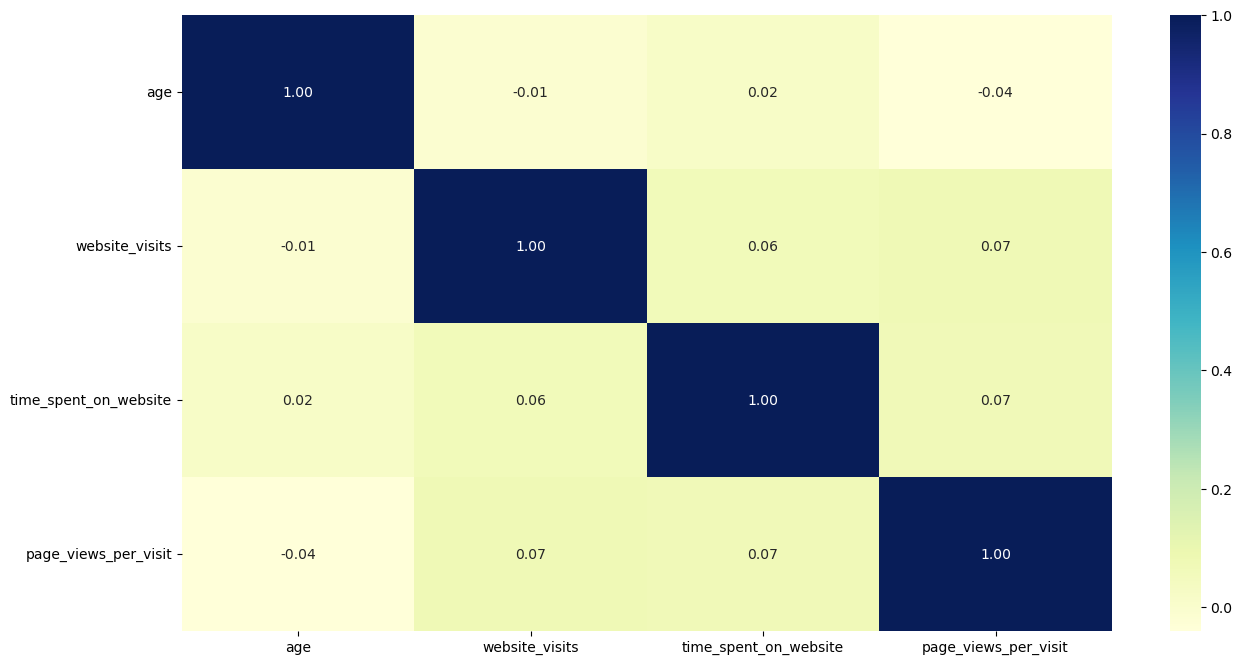

In [57]:
# correlation between numerical features
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Observations**
1. Students seem to have much fewer positive lead statuses than professionals and the unemployed.
2. Leads with first interaction with website seem to have far more positive statuses than leads with first interaction as mobile app.
3. It seems that the the different modes of interaction have similar impact on lead status.
4. It seems that all channels have very similar lead conversion rates.
5. Yes, it looks like having more details about a prospect does increase the chances of conversion.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [65]:
# drop ID since it is unique for each lead
df = df.drop(['ID'], axis=1)

# make dummy variables
to_get_dummies_for = ['current_occupation', 'first_interaction','profile_completed', 'last_activity']
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

# convert the Yes/No columns to 0s and 1s
dict_print_media_type1 = {'Yes': 1, 'No':0}
dict_print_media_type2 = {'Yes': 1, 'No':0}
dict_digital_media = {'Yes': 1, 'No':0}
dict_educational_channels = {'Yes': 1, 'No':0}
dict_referral = {'Yes': 1, 'No':0}

df['print_media_type1'] = df.print_media_type1.map(dict_print_media_type1)
df['print_media_type2'] = df.print_media_type2.map(dict_print_media_type2)
df['digital_media'] = df.digital_media.map(dict_digital_media)
df['educational_channels'] = df.educational_channels.map(dict_educational_channels)
df['referral'] = df.referral.map(dict_referral)

# prepare X and y
X = df.drop(['status'], axis=1)
y = df.status

df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,0,1,1,0,0,0,1
1,56,2,83,0.320,0,0,0,1,0,0,0,0,0,0,1,0,1
2,52,3,330,0.074,0,0,1,0,0,0,0,0,1,0,1,0,1
3,53,4,464,2.057,0,0,0,0,0,1,0,1,1,0,0,0,1
4,23,4,600,16.914,0,0,0,0,0,0,1,0,1,0,0,0,0


## EDA

- It is a good idea to explore the data once again after manipulating it.

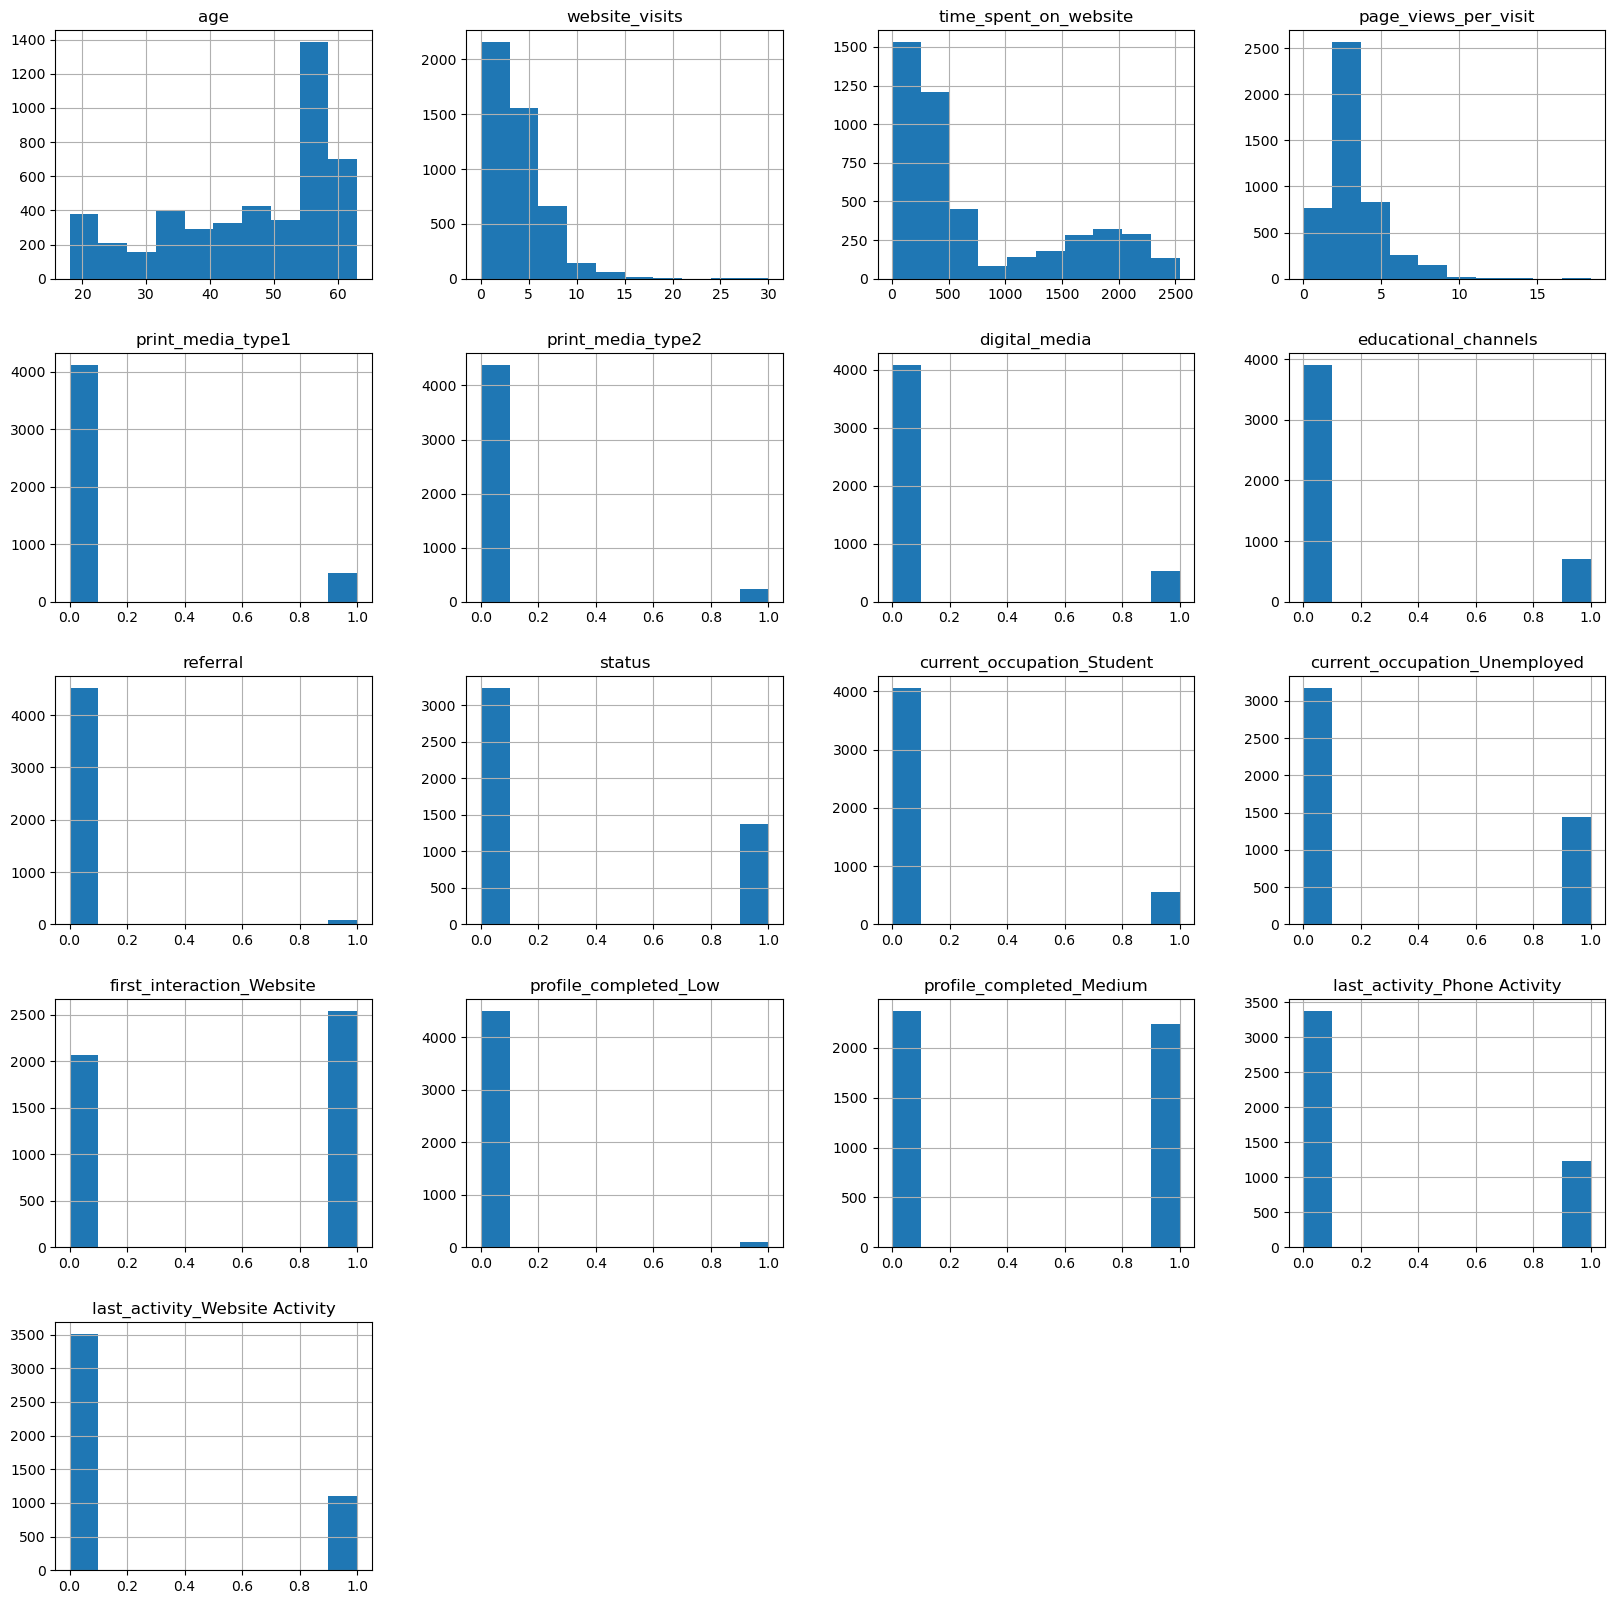

In [63]:
# histograms for all columns
df[df.columns].hist(figsize=(20,20))
plt.show()

## Building a Decision Tree model

In [106]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

# To plot performance
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

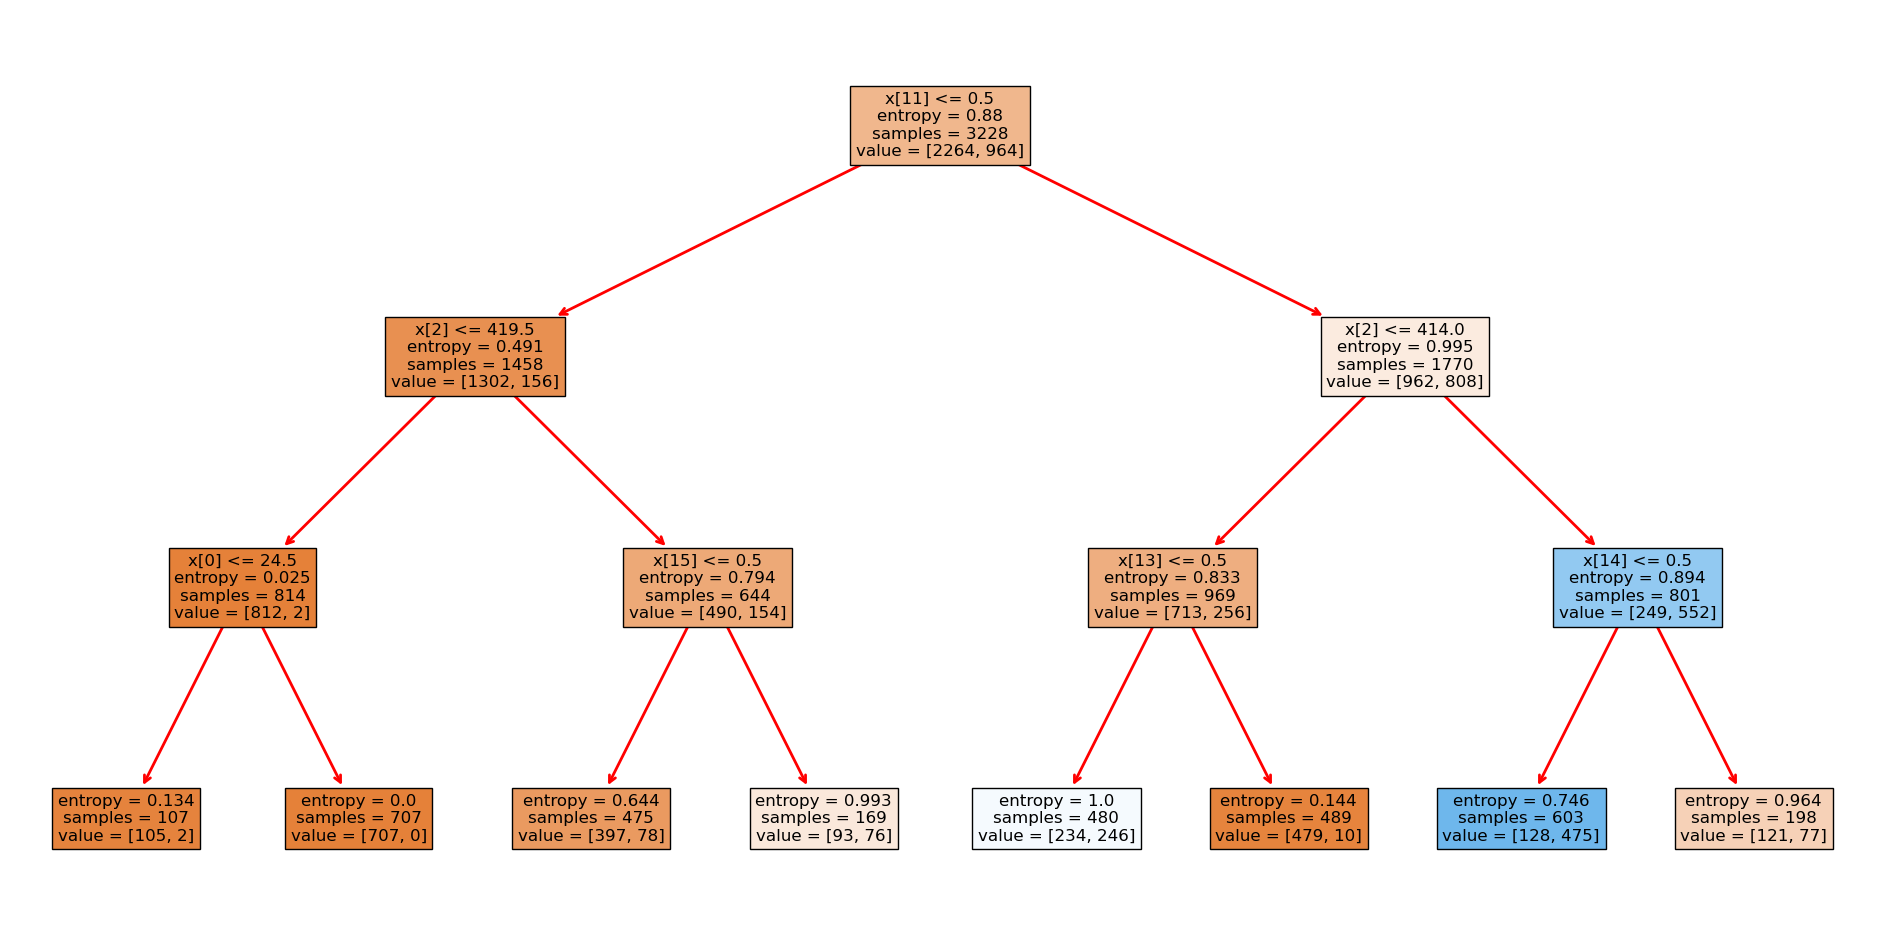

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2264
           1       0.67      0.75      0.70       964

    accuracy                           0.81      3228
   macro avg       0.78      0.79      0.78      3228
weighted avg       0.82      0.81      0.82      3228



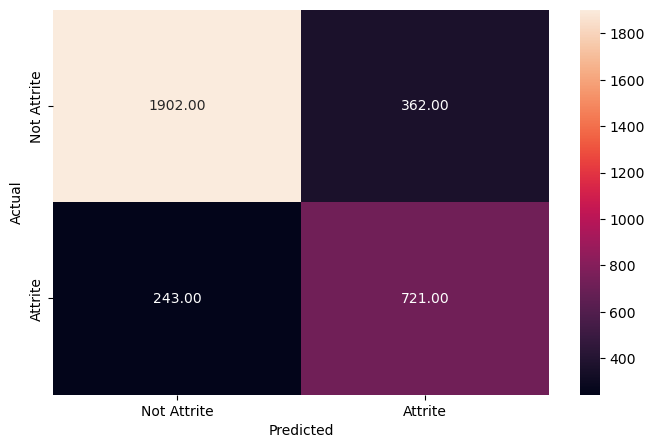

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       971
           1       0.63      0.72      0.67       413

    accuracy                           0.79      1384
   macro avg       0.75      0.77      0.76      1384
weighted avg       0.80      0.79      0.79      1384



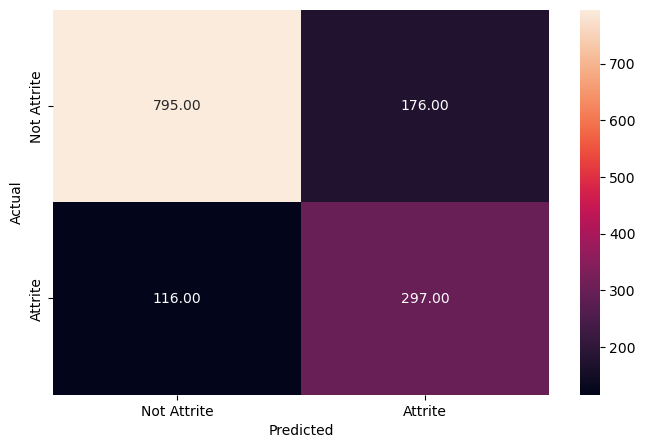

In [107]:
clf_tree = tree.DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 3)
clf_tree = clf_tree.fit(X_train, y_train)

fig, ax = plt.subplots(figsize = (24, 12))

out = tree.plot_tree(clf_tree, filled = True, fontsize = 12)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None: 
        arrow.set_edgecolor('red') 
        arrow.set_linewidth(2)
plt.show()

y_pred_train_tree = clf_tree.predict(X_train)
y_pred_test_tree = clf_tree.predict(X_test)

metrics_score(y_train, y_pred_train_tree)
metrics_score(y_test, y_pred_test_tree)

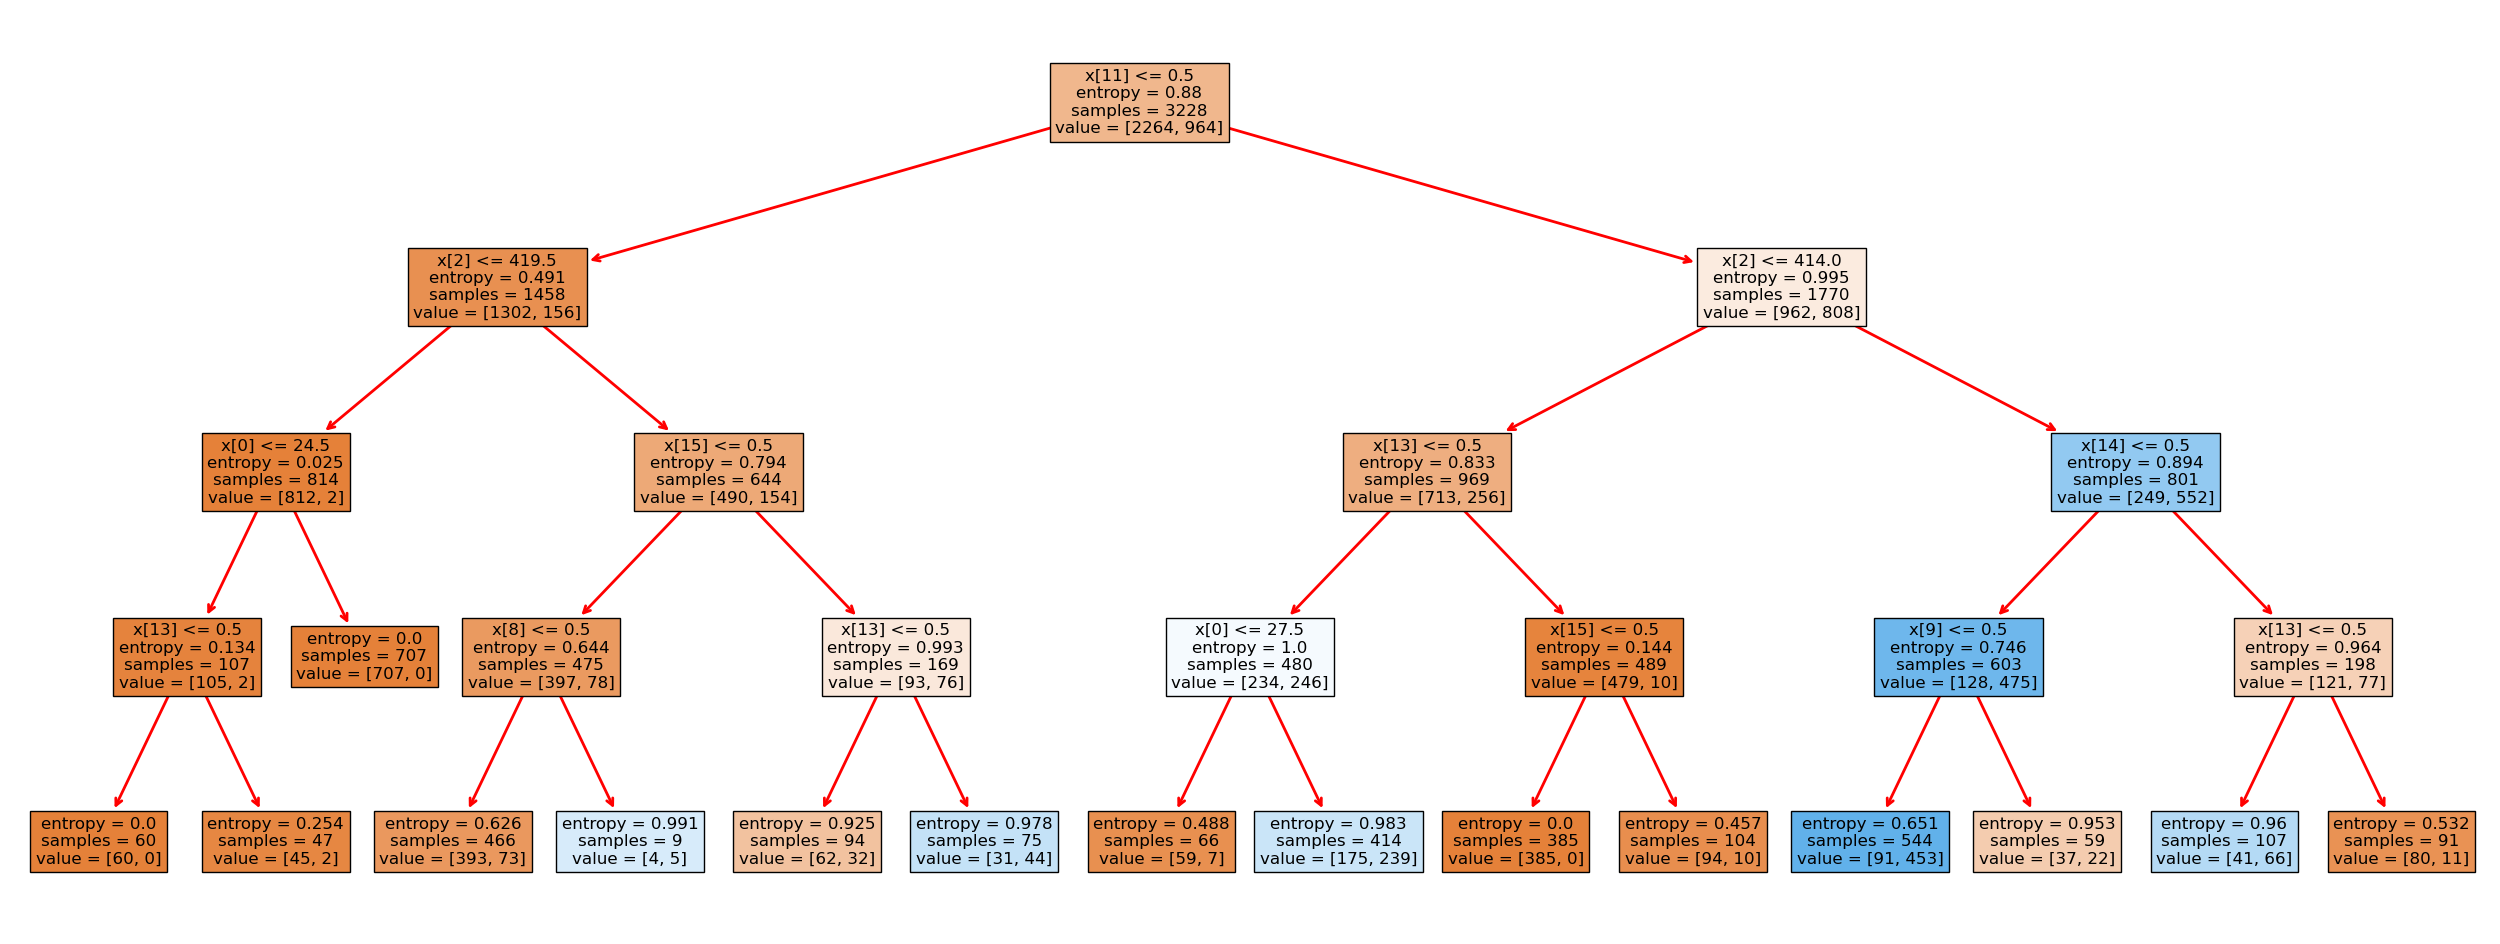

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2264
           1       0.70      0.84      0.76       964

    accuracy                           0.85      3228
   macro avg       0.81      0.84      0.82      3228
weighted avg       0.86      0.85      0.85      3228



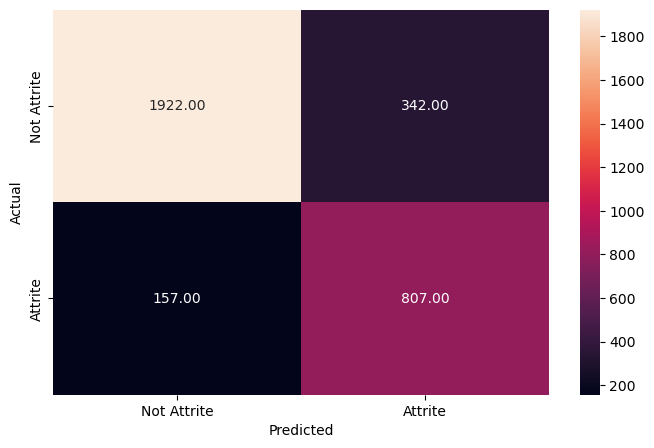

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       971
           1       0.68      0.82      0.74       413

    accuracy                           0.83      1384
   macro avg       0.80      0.83      0.81      1384
weighted avg       0.85      0.83      0.83      1384



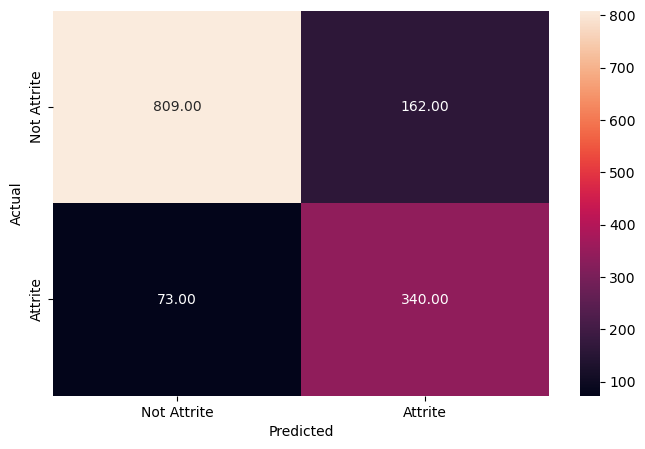

In [108]:
clf_tree = tree.DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 4)
clf_tree = clf_tree.fit(X_train, y_train)

fig, ax = plt.subplots(figsize = (32, 12))

out = tree.plot_tree(clf_tree, filled = True, fontsize = 12)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None: 
        arrow.set_edgecolor('red') 
        arrow.set_linewidth(2)
plt.show()

y_pred_train_tree = clf_tree.predict(X_train)
y_pred_test_tree = clf_tree.predict(X_test)

metrics_score(y_train, y_pred_train_tree)
metrics_score(y_test, y_pred_test_tree)

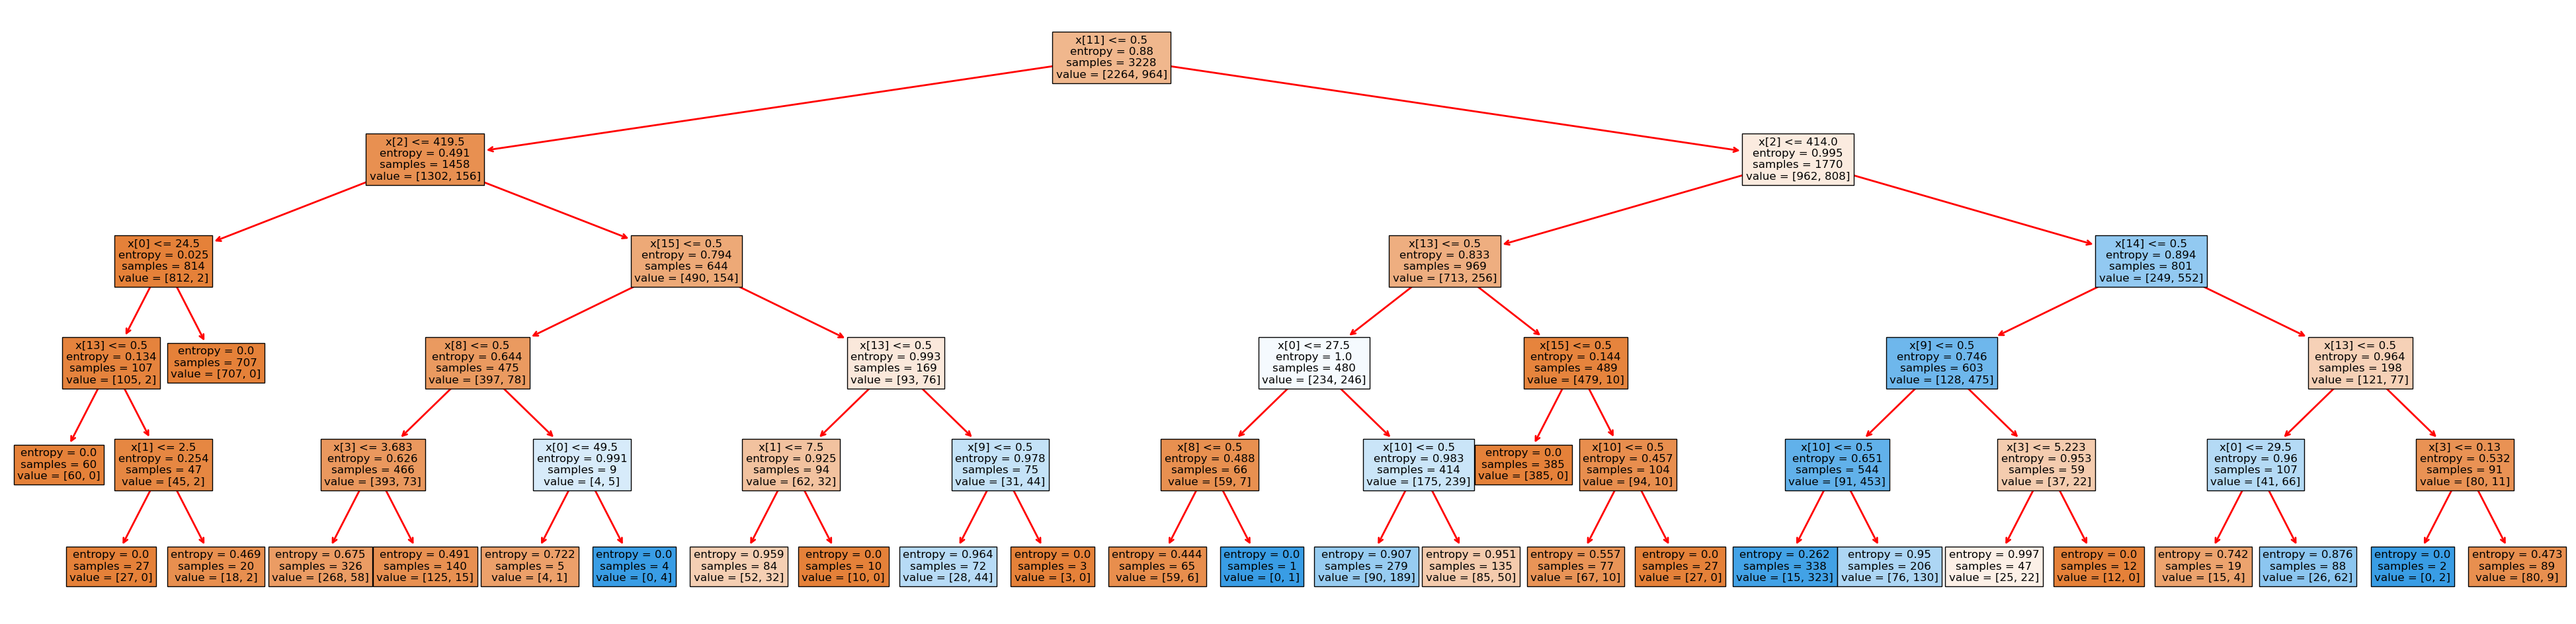

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2264
           1       0.76      0.78      0.77       964

    accuracy                           0.86      3228
   macro avg       0.83      0.84      0.84      3228
weighted avg       0.86      0.86      0.86      3228



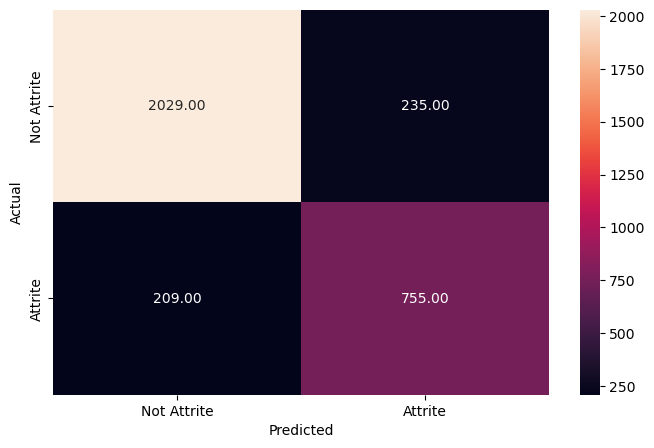

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       971
           1       0.75      0.75      0.75       413

    accuracy                           0.85      1384
   macro avg       0.82      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384



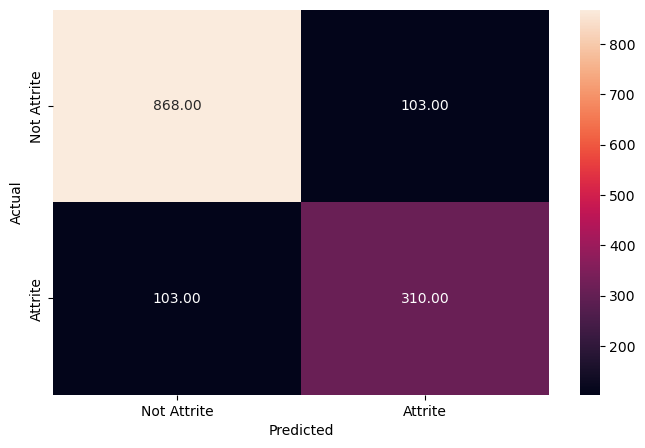

In [110]:
clf_tree = tree.DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 5)
clf_tree = clf_tree.fit(X_train, y_train)

fig, ax = plt.subplots(figsize = (50, 12))

out = tree.plot_tree(clf_tree, filled = True, fontsize = 12)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None: 
        arrow.set_edgecolor('red') 
        arrow.set_linewidth(2)
plt.show()

y_pred_train_tree = clf_tree.predict(X_train)
y_pred_test_tree = clf_tree.predict(X_test)

metrics_score(y_train, y_pred_train_tree)
metrics_score(y_test, y_pred_test_tree)

## Do we need to prune the tree?

Comparing the depths 3, 4 and 5 trees, we can see somethign interesting:
Most branches seem to be falling in one of two categories:
1) Low entropy is reached in only a few levels, and then entropy stagnates or even increases
2) Entropy remains high throughout the branch

As a result, if we choose higher depths, then we must prune the branches that reach low entropy quickly.
On the other hand, some branches may need very high dpeths to reach low entropy, which heavily risks overfitting.
As a result, it might be best to use a depth 3 tree and perform very little if any pruning.

Additionally, we can also note that while there were some small improvements in precision and recall between the trees of depth 3 and depth 4, but a reduction between trees of depth 4 and depth 5. Thus, a tree of depth 4 might be the best, although pruning would still be beneficial.

## Building a Random Forest model

In [95]:
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



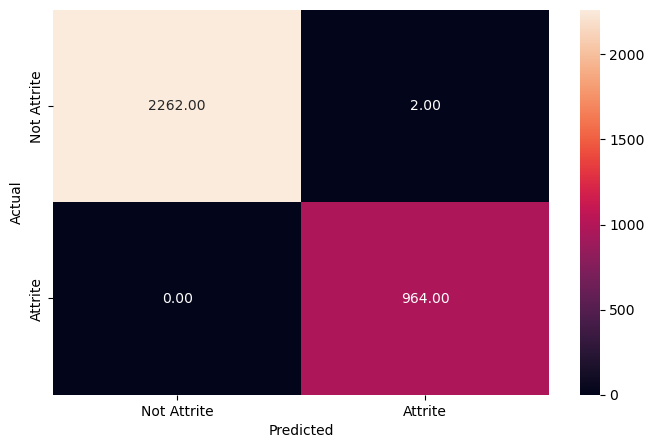

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.80      0.70      0.75       413

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.86      0.86      1384



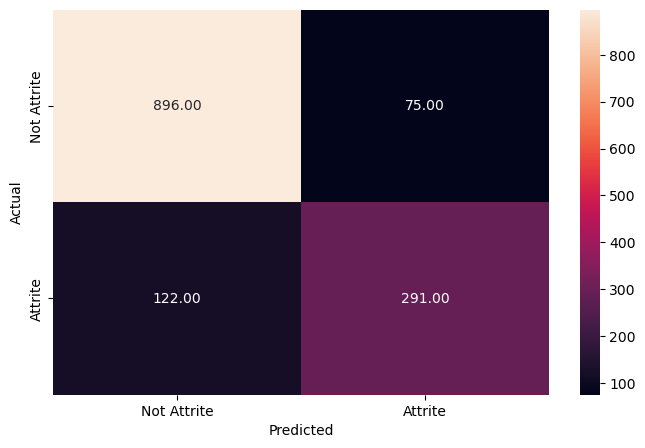

In [100]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_train, y_pred_train_rf)
metrics_score(y_test, y_pred_test_rf)

## Do we need to prune the tree?

Since the training data has perfect precision and recall, the model might be overfitting. Thus, pruning might be useful to improve the model's performance on test data. This can also be seen as the test performance of the Random Forest model is very close to the performance of the decision tree, which suggests that there might be overfitting issues that is limiting the performance of the Ranodm Forest model.

## Actionable Insights and Recommendations

Based on the factors that seem to have the most impact on the conversion rate, the following is recommended:

1. Leads with referrals are substantially more likely to convert, and thus should be prioritized.
2. Leads who are students are much less likely to convert as compared to leads that are professionally working or unemployed, and thus should be deprioritized.
3. The higher the profile completion, the higher the conversion rate. Thus, more emphasis should be put on profile completion, and leads with mor eprofile completion should be prioritized.
4. Leads with initial exposure via the website and substantially more likely to be converted as compared to the mobile app. Thus, efforts to spread exposure to the website can be effective in improving the conversion rate of leads.